In [71]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, output_notebook, show, ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Blues8
from bokeh.palettes import Inferno256
from bokeh.layouts import row, gridplot

In [72]:
# Import Monthly Movie data 2019-2023
monthly_df = pd.read_csv('master_merged_df.csv')

In [73]:
monthly_df.columns

Index(['Month', 'Year', 'Cumulative Gross', '% of Year', 'Releases', 'Average',
       'Holiday Gross', 'Holiday Releases'],
      dtype='object')

In [74]:
monthly_df.describe()

,Year,Cumulative Gross,Releases,Average,Holiday Gross,Holiday Releases
count,60.000000,6.000000e+01,60.0000,6.000000e+01,4.500000e+01,45.000000
mean,2021.000000,5.684491e+08,111.4500,4.769574e+06,1.216581e+08,56.000000
std,1.426148,3.659464e+08,51.1334,3.013337e+06,7.609595e+07,27.923597
min,2019.000000,5.201500e+04,6.0000,8.669000e+03,3.675000e+03,2.000000
25%,2020.000000,3.057117e+08,84.7500,2.557546e+06,7.117277e+07,39.000000
50%,2021.000000,5.836546e+08,97.0000,4.761163e+06,1.225954e+08,51.000000
75%,2022.000000,8.190449e+08,136.5000,6.212085e+06,1.711099e+08,74.000000
max,2023.000000,1.362544e+09,225.0000,1.481026e+07,2.622693e+08,122.000000


In [75]:
monthly_df.head(3)

,Month,Year,Cumulative Gross,% of Year,Releases,Average,Holiday Gross,Holiday Releases
0,December,2023,619983163,7.1%,131,4732695,146273052.0,35.0
1,November,2023,551964146,6.3%,111,4972649,173203005.0,40.0
2,October,2023,556040943,6.3%,115,4835138,92909357.0,83.0


In [76]:
reverse_rev = monthly_df.iloc[::-1]
reverse_rev.head()

,Month,Year,Cumulative Gross,% of Year,Releases,Average,Holiday Gross,Holiday Releases
59,January,2019,812849718,7.2%,161,5048756,221945359.0,122.0
58,February,2019,624462229,5.5%,147,4248042,152447001.0,86.0
57,March,2019,962715490,8.5%,192,5014143,NaN,NaN
56,April,2019,1034983338,9.1%,220,4704469,121560823.0,74.0
55,May,2019,1077667188,9.5%,225,4789631,230819376.0,97.0


In [77]:
reverse_rev['Month'].values

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [78]:
# monthly_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
#        'August', 'September', 'October', 'November', 'December']

# monthly_gross_avg = []
# monthly_holiday_avg = []

gross_df = reverse_rev[['Month', 'Cumulative Gross']].groupby('Month').mean().reset_index()
h_rev_df = reverse_rev[['Month', 'Holiday Gross']].groupby('Month').mean().reset_index()

gross_df.columns = ['Month', 'Monthly Average']
h_rev_df.columns = ['Month', 'Holiday Average']

# display(gross_df.head())
# display(h_rev_df.head())

reverse_rev = pd.merge(reverse_rev, gross_df,  how='left', left_on=['Month'], right_on = ['Month'])
reverse_rev = pd.merge(reverse_rev, h_rev_df,  how='left', left_on=['Month'], right_on = ['Month'])

reverse_rev.head(12)

,Month,Year,Cumulative Gross,% of Year,Releases,Average,Holiday Gross,Holiday Releases,Monthly Average,Holiday Average
0,January,2019,812849718,7.2%,161,5048756,221945359.0,122.0,550055776.6,157609615.0
1,February,2019,624462229,5.5%,147,4248042,152447001.0,86.0,437138364.0,125385426.8
2,March,2019,962715490,8.5%,192,5014143,NaN,NaN,511442553.0,NaN
3,April,2019,1034983338,9.1%,220,4704469,121560823.0,74.0,540402535.2,104099677.2
4,May,2019,1077667188,9.5%,225,4789631,230819376.0,97.0,570672782.4,151209953.4
5,June,2019,1149048054,10.1%,192,5984625,NaN,NaN,705336248.2,NaN
6,July,2019,1288196026,11.3%,190,6779979,46565065.0,54.0,874921850.0,110742495.6
7,August,2019,837630353,7.4%,211,3969812,NaN,NaN,513487021.4,NaN
8,September,2019,686794246,6%,204,3366638,120764144.0,82.0,387223324.4,93177343.0
9,October,2019,781643933,6.9%,217,3602045,170589530.0,113.0,498682263.0,98416307.2


In [79]:
reverse_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             60 non-null     object 
 1   Year              60 non-null     int64  
 2   Cumulative Gross  60 non-null     int64  
 3   % of Year         60 non-null     object 
 4   Releases          60 non-null     int64  
 5   Average           60 non-null     int64  
 6   Holiday Gross     45 non-null     float64
 7   Holiday Releases  45 non-null     float64
 8   Monthly Average   60 non-null     float64
 9   Holiday Average   45 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 4.8+ KB


In [104]:
sns.set_palette("Accent")
sns.color_palette("Accent")

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4)]

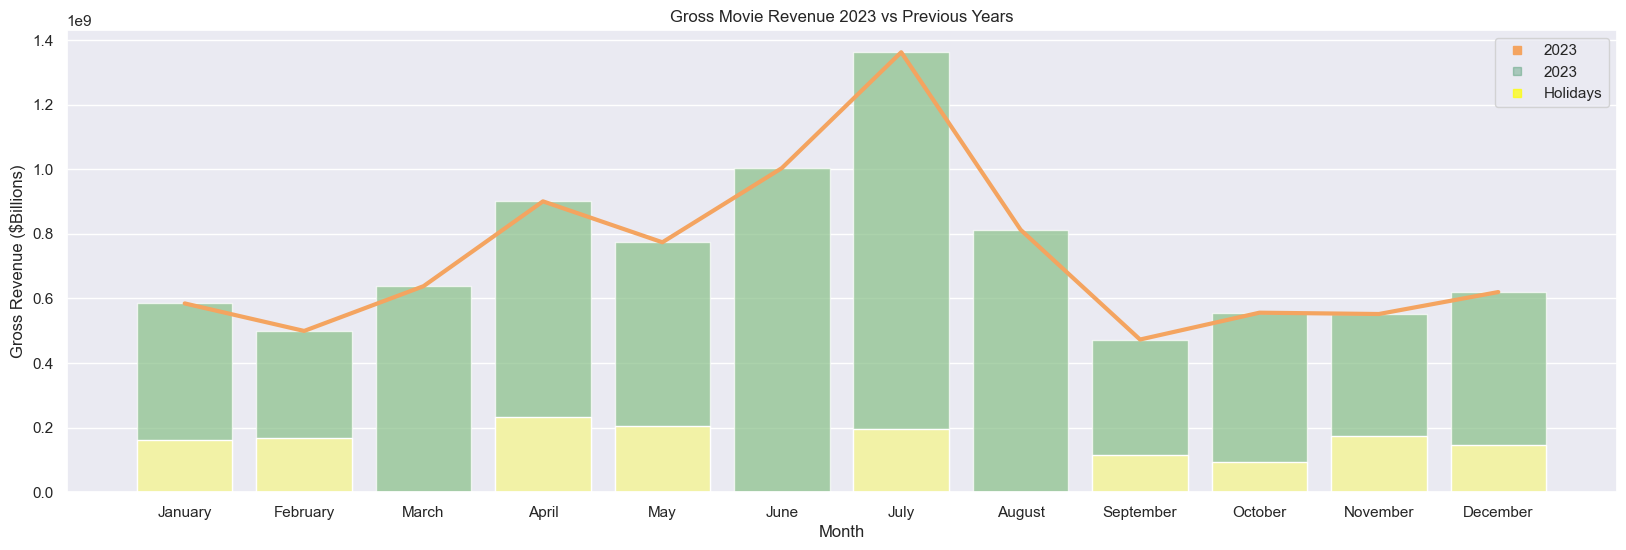

In [128]:
# Plot Revenues
import matplotlib.lines as mlines

# Input years to compare
reference_year = 2023      # Line plot input
dropdown_year = 2023       # Barplot input/Dropdown Button

# Adjust Dataframes to Input years
rev_2023 = reverse_rev[reverse_rev['Year'] == reference_year]
rev_not_2023 = reverse_rev[reverse_rev['Year'] == dropdown_year]
# Create figure
plt.figure(figsize=(20, 6))
sns.set_style('darkgrid')
# layer the plots
sns.barplot(data=rev_not_2023, x='Month', y='Cumulative Gross', hue='Year', palette = 'Accent', alpha = .7)
sns.barplot(data=rev_not_2023, x='Month', y='Holiday Gross', hue='Year', palette = 'Accent_r', alpha = 1.0)
sns.lineplot(data=rev_2023, x='Month', y='Cumulative Gross', color = 'sandybrown', linewidth = 3)
# Legends/Labels
plt.ylabel('Gross Revenue ($Billions)')
drop_year = mlines.Line2D([], [], color='seagreen', marker='s', ls='', alpha=.35, label=f'{dropdown_year}')
ref_year = mlines.Line2D([], [], color='sandybrown', marker='s', ls='', label=f'{reference_year}')
holiday = mlines.Line2D([], [], color='yellow', marker='s', ls='', alpha=.7, label='Holidays')
plt.legend(handles=[ref_year, drop_year, holiday])
plt.title('Gross Movie Revenue 2023 vs Previous Years')

# plt.savefig('Gross_Rev_Vis_Single')
plt.show()

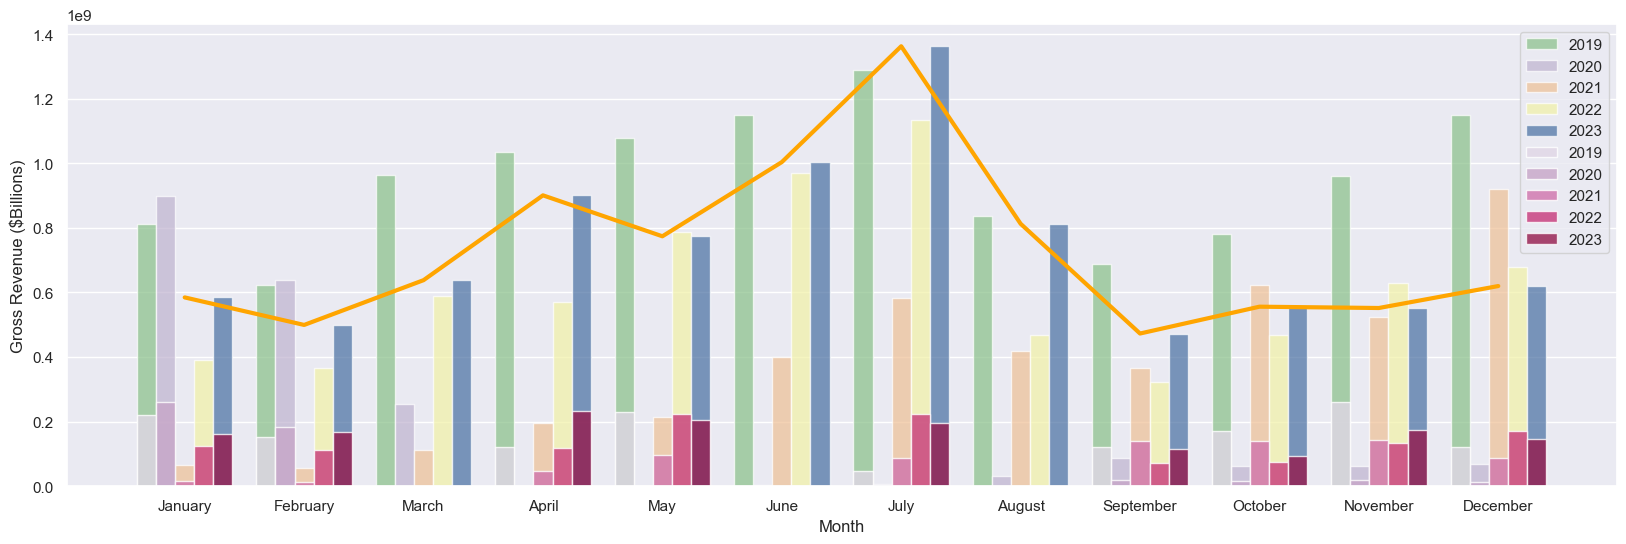

In [120]:
# Plot Revenues
import matplotlib.lines as mlines

# Input years to compare
reference_year = 2023      # Line plot input
# comparable_year = 2021     # Barplot input

# Adjust Dataframes to Input years
rev_2023 = reverse_rev[reverse_rev['Year'] == reference_year]
# rev_not_2023 = reverse_rev[reverse_rev['Year'] == comparable_year]

# Create figure
plt.figure(figsize=(20, 6))
sns.set_style('darkgrid')

# layer the plots
sns.barplot(data=reverse_rev, x='Month', y='Cumulative Gross', hue='Year', palette = 'Accent', alpha = .7)
sns.barplot(data=reverse_rev, x='Month', y='Holiday Gross', hue='Year', palette = 'PuRd', alpha = .8)
sns.lineplot(data=rev_2023, x='Month', y='Cumulative Gross', color = 'orange', linewidth = 3)

# Legends/Labels
plt.ylabel('Gross Revenue ($Billions)')
# c_year = mlines.Line2D([], [], color='seagreen', marker='s', ls='', alpha=.35, label='Gross')
# ref_year = mlines.Line2D([], [], color='orange', marker='s', ls='', label=f'{reference_year}')
# holiday = mlines.Line2D([], [], color='yellow', marker='s', ls='', alpha=.7, label='Holidays')

# plt.legend(handles=[ref_year, c_year, holiday])
plt.rcParams["figure.figsize"] = (1200, 600)

plt.show()

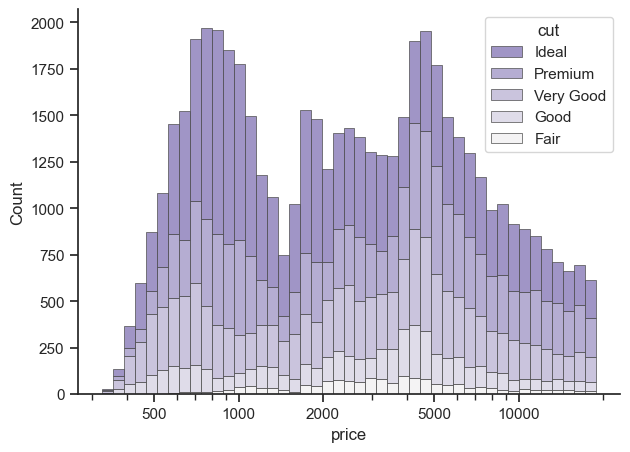

In [30]:
# Seaborn gallery example using histplot to make a stacked bar chart
import matplotlib as mpl
sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [121]:
# Stacked Bar Example from the Bokeh Documentation
from bokeh.palettes import HighContrast3
from bokeh.plotting import figure, show

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
years = ["2015", "2016", "2017"]

data = {'fruits' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 4, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

p = figure(x_range=fruits, height=250, title="Fruit Counts by Year",
           toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

p.vbar_stack(years, x='fruits', width=0.9, color=HighContrast3, source=data,
             legend_label=years)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"




show(p)

In [124]:
from bokeh.plotting import figure, show

p = figure(width=400, height=400)

# add a line renderer
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)

show(p)